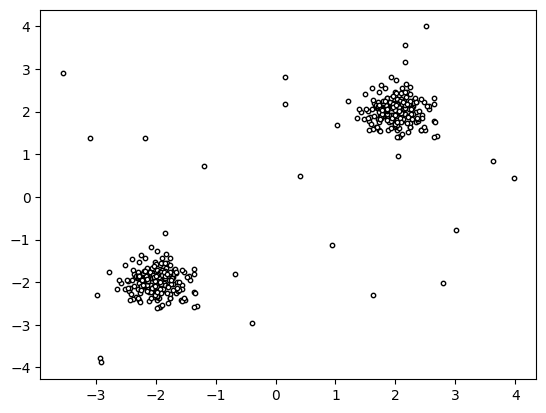

In [10]:
# 이상 탐지
# 정상 데이터와 다른 데이터를 구분
# 보안, 안전 분야에서 각광
# Isolation Forest  고립된  숲

from sklearn.ensemble import IsolationForest
import numpy as np
import matplotlib.pylab as plt

# 실습용 데이터 만들기
np.random.seed(42) # 해당 로직에서 랜덤 시드 고정

# 정상 데이터 200개 만들기
X_nomal = np.random.randn(200,2) * 0.3
X_nomal = np.r_[X_nomal + 2, X_nomal - 2] 

# 이상 데이터 20개 만들기
X_outlier = np.random.uniform(low= -4, high= 4, size=(20,2))
X_outlier # -4 ~ 4 범위를 가진 20개의 데이터 (2개의 feature)

X=np.r_[X_nomal, X_outlier]
X.shape # 정상 200 X 2 + 이상 20개

# 이상 탐지 이전 시각화
plt.scatter(X[:, 0], X[:, 1], s=10, c="white", edgecolors="black")
plt.show()

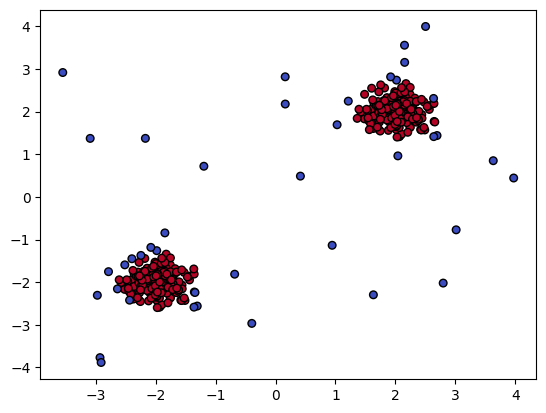

In [14]:
# 고립된 숲
# contamination 이상치 추정 (비우면 자동으로 진행)
isf = IsolationForest(contamination=0.1, random_state=42) # (random_state=42)
y_pred = isf.fit_predict(X)
plt.scatter(X[:,0], X[:,1], c=y_pred, cmap="coolwarm", s=30, edgecolors="black")
plt.show()

In [15]:
# 28만개
!curl -L https://storage.googleapis.com/download.tensorflow.org/data/creditcard.csv -o creditcard.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0  143M    0 1358k    0     0   942k      0  0:02:36  0:00:01  0:02:35  943k
  2  143M    2 4030k    0     0  1658k      0  0:01:28  0:00:02  0:01:26 1658k
  4  143M    4 6158k    0     0  1794k      0  0:01:22  0:00:03  0:01:19 1795k
  4  143M    4 7118k    0     0  1595k      0  0:01:32  0:00:04  0:01:28 1595k
  5  143M    5 7694k    0     0  1416k      0  0:01:43  0:00:05  0:01:38 1655k
  5  143M    5 8686k    0     0  1349k      0  0:01:49  0:00:06  0:01:43 1466k
  6  143M    6 9774k    0     0  1315k      0  0:01:51  0:00:07  0:01:44 1148k
  7  143M    7 10.2M    0     0  1240k      0  0:01:58  0:00:08  0:01:50  860k
  7  143M    7 11.2M    0     0  1221k      0  0:02

In [18]:
# 카드 거래 명세
import pandas as pd

df = pd.read_csv("creditcard.csv")

In [29]:
df.head() # V1 ~ V28 개인정보 보호를 위해 마스킹 처리된 Feature
# class : 0 -> 정상
# class : 1 -> 사기 거래 (0.17%)
df["Class"].value_counts()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class,Scaled_Amount,Scaled_Time
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,0.244964,-1.996583
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,-0.342475,-1.996583
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,1.160686,-1.996562
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,0.140534,-1.996562
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,-0.073403,-1.996541


In [30]:
# Time, Amount를 전처리-스케일링
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df["Scaled_Amount"] = scaler.fit_transform(df["Amount"].values.reshape(-1,1))
df["Scaled_Time"] = scaler.fit_transform(df["Time"].values.reshape(-1,1))

X = df.drop(["Time", "Amount", "Class"], axis=1)
X.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Scaled_Amount,Scaled_Time
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,-1.996583
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,-1.996583
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,-1.996562
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,-1.996562
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,-1.996541


In [33]:
# 실제 사기 비율 : 0.17%
fraud_ratio = df["Class"].value_counts(normalize=True)[1]

isf = IsolationForest(contamination=fraud_ratio, random_state=42)
y_pred = isf.fit_predict(X)
y_pred

array([1, 1, 1, ..., 1, 1, 1])

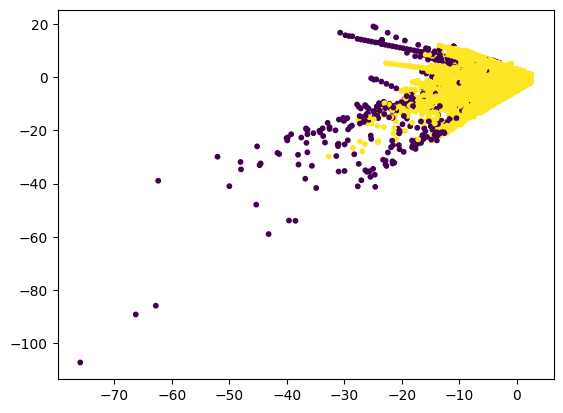

In [37]:
# feature가 30개 -> 2개로 차원 축소
# PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_pred, s=10)
plt.show()

In [ ]:
# 전처리

In [64]:
test = pd.read_csv("test.csv")
test["Surived"] = test["Sex"].apply(lambda x : 1 if x == "female" else 0)

col1 = test.columns[:1].to_list()
col2 = test.columns[-1:].to_list()
col3 = test.columns[1:-1].to_list()
new_col = col1 + col2 + col3
test = test[new_col]
test.head()

test.to_csv("test2.csv")

In [91]:
# train.csv를 가지고 오자
import pandas as pd
train = pd.read_csv("train.csv")

# 결측지 확인 용 info
# train.info()

# 우리가 처리해야 할 결측지 2개 컬럼 ("Age", "Cabin","Embarked")

# 결축치 계수 확인
print("초기 결측치 개수: ", train.isnull().sum())

초기 결측치 개수:  PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [92]:
# Age 컬럼의 결축치를 어떻게 처리할건지

# 1) mean으로 대체하자
# 2) median으로 대체하자
# 3) 최빈값으로 대체하자

mean_age = train["Age"].mean()
train["Age"].fillna(mean_age, inplace=True)

train["Age"].describe()

C:\Users\KCCISTC\AppData\Local\Temp\ipykernel_3120\997362987.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train["Age"].fillna(mean_age, inplace=True)


count    891.000000
mean      29.699118
std       13.002015
min        0.420000
25%       22.000000
50%       29.699118
75%       35.000000
max       80.000000
Name: Age, dtype: float64

In [93]:
# "Cabin"은 결측치가 너무 많다
# 모델 학습에 "Cabin"컬럼은 제외하자
train = train.drop("Cabin", axis=1)
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [94]:
# "Embarked" 2개 결측치 처리하자
train["Embarked"].value_counts() # S가 가장 많다
train["Embarked"] = train["Embarked"].fillna("S")
train["Embarked"].value_counts()

Embarked
S    646
C    168
Q     77
Name: count, dtype: int64

In [95]:
print("결측치 개수: ", train.isnull().sum())

결측치 개수:  PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


In [111]:
train.isnull().sum() # 결축치 해결 완료

# 범주형 -> True, False 전처리
# One-Hot Encoding (Sex, Embarked)

# from sklearn.preprocessing import OneHotEncoder
# one_hot_e = OneHotEncoder(sparse_output=False)
# Sex_t = one_hot_e.fit_transform(train[["Sex"]])

# Embarked_t = one_hot_e.fit_transform(train[["Embarked"]])
# Embarked_t

# 좀 더 간단한 인코딩
from mlxtend.preprocessing import TransactionEncoder
te = TransactionEncoder()
train["Female"] = te.fit(train["Sex"]).fit_transform(train[["Sex"]].values)[:, 0]
train["male"] = te.fit(train["Sex"]).fit_transform(train[["Sex"]].values)[:, 1]

train["C"] = te.fit(train["Embarked"]).fit_transform(train[["Embarked"]].values)[:,0]
train["Q"] = te.fit(train["Embarked"]).fit_transform(train[["Embarked"]].values)[:,1]
train["S"] = te.fit(train["Embarked"]).fit_transform(train[["Embarked"]].values)[:,2]
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Male,Female,S,C,Q,male
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,False,False,True,False,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,True,True,False,True,False,False
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,True,True,True,False,False,False
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,True,True,True,False,False,False
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,False,False,True,False,False,True


In [116]:
# 의사 결정 트리
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

# train에서 필요 없는 컬럼 drop
train_d = train.drop(["PassengerId", "Name", "Ticket", "Sex", "Embarked"], axis=1)
train_d


X = train_d.iloc[ : , 1 : ]
y = train_d.iloc[ :,0]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

d_tree = DecisionTreeClassifier(max_depth=3, random_state=42)
d_tree.fit(X_train, y_train)
y_pred = d_tree.predict(X_test)

from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_pred, y_test)
print(f"정확도: {accuracy}")

정확도: 0.8026905829596412


In [8]:
# 타이타닉 데이터 전처리 함수

import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
def titanic_preprcess(file):
    train = pd.read_csv(file)
    
    mean_age = train["Age"].mean()
    train["Age"].fillna(mean_age, inplace=True)
    
    train["Age"].describe()
    train = train.drop("Cabin", axis=1)
    
    train["Embarked"].value_counts()
    train["Embarked"] = train["Embarked"].fillna("S")
    train["Embarked"].value_counts()

    te = TransactionEncoder()
    train["Female"] = te.fit(train["Sex"]).fit_transform(train[["Sex"]].values)[:, 0]
    train["Male"] = te.fit(train["Sex"]).fit_transform(train[["Sex"]].values)[:, 1]
    train["C"] = te.fit(train["Embarked"]).fit_transform(train[["Embarked"]].values)[:, 0]
    train["Q"] = te.fit(train["Embarked"]).fit_transform(train[["Embarked"]].values)[:, 1]
    train["S"] = te.fit(train["Embarked"]).fit_transform(train[["Embarked"]].values)[:, 2]
    return train

In [ ]:
# 의사 결정 트리
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split


# train에서 필요 없는 컬럼 drop
train_d = train.drop(["PassengerId", "Name", "Ticket", "Sex", "Embarked"], axis=1)
train_d


X = train_d.iloc[ : , 1 : ]
y = train_d.iloc[ :,0]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

d_tree = DecisionTreeClassifier(max_depth=3, random_state=42)
d_tree.fit(X_train, y_train)
y_pred = d_tree.predict(X_test)

from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_pred, y_test)
print(f"정확도: {accuracy}")

In [37]:
# 0911
# train.csv 혹은 test.csv -> 전처리
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder # One-Hot Encoding 용!!
def titanic_pp(file):
    # 1) csv 읽기 -> df으로 변환
    df = pd.read_csv(file)
    
    # 2) Age 결측치 mean으로 대입
    age_mean = df["Age"].mean()
    df["Age"] = df["Age"].fillna(age_mean)
    
    # 3) Cabin 결측치 -> drop
    df = df.drop("Cabin", axis=1)
    
    # 4) Embarked 결측치 2개 -> 최빈값 S로 대체
    df["Embarked"] = df["Embarked"].fillna("S")
    
    # 5) Fare 요금 분석 결과 drop
    df = df.drop("Fare", axis=1)
    df = df.drop("Name", axis=1)
    df = df.drop("Ticket", axis=1)
    
    # 6) Sex, Embarked -> One-Hot Enconding
    te = TransactionEncoder()
    df["Female"] = te.fit(df["Sex"]).fit_transform(df[["Sex"]].values)[:, 0]
    df["Male"] = te.fit(df["Sex"]).fit_transform(df[["Sex"]].values)[:, 1]
    df["C"] = te.fit(df["Embarked"]).fit_transform(df[["Embarked"]].values)[:, 0]
    df["Q"] = te.fit(df["Embarked"]).fit_transform(df[["Embarked"]].values)[:, 1]
    df["S"] = te.fit(df["Embarked"]).fit_transform(df[["Embarked"]].values)[:, 2]
    df = df.drop("Sex", axis=1)
    df = df.drop("Embarked", axis=1)
    return df

In [15]:
df_train = titanic_pp("train.csv")
df_train.head()

# 원하는 모델 사용해서 학습!!!
# K-NN, Decision Tree, SVM
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier # 추가된 1줄

df_train = df_train.drop("PassengerId", axis=1)

X = df_train.iloc[ : , 1 : ]
y = df_train.iloc[ : , 0]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
# knn = KNeighborsClassifier(n_neighbors=3)
# knn.fit(X_train, y_train)


d_tree = DecisionTreeClassifier(max_depth=3, random_state=42)
d_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [16]:
from sklearn.metrics import accuracy_score
y_pred = d_tree.predict(X_test)
accuracy = accuracy_score(y_pred, y_test)
print(f"정확도: {accuracy}")

정확도: 0.8026905829596412


In [11]:
df_test = titanic_pp("test.csv")
df_test.head()

,PassengerId,Pclass,Age,SibSp,Parch,Female,Male,C,Q,S
0,892,3,34.5,0,0,False,True,False,True,False
1,893,3,47.0,1,0,True,False,False,False,True
2,894,2,62.0,0,0,False,True,False,True,False
3,895,3,27.0,0,0,False,True,False,False,True
4,896,3,22.0,1,1,True,False,False,False,True


In [12]:
# test.csv 의 X
test_X = df_test.iloc[ : , 1 : ]
test_y = d_tree.predict(test_X)
df_test["Survived"] = test_y
df_test.head()
df_test = df_test[["PassengerId", "Survived"]]
df_test.head()
df_test.to_csv("submit2.csv", index=None)

In [38]:
# 로지스틱 회귀 (Logistiic Regression)
# 회귀 (연속적인 수치 -> 예측)
# Linear Regression
# y = W1x1 + w2x2 + ... + b
# y 자체가 수치
# y를 우리가 원하는 범위 0 ~ 1로 변환 (시그모이드 : 로지스틱)
# 변환된 값이 0.85 -> 0.5이상 -> True
# 변환된 값이 0.3 -> 0.5미만 -> False
# 회귀 자체를 분류처럼 사용할 수 있게 해주는 알고리즘

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

logistic = LogisticRegression(solver="lbfgs", C=1.0, max_iter=1000)
df_train = titanic_pp("train.csv")
df_train = df_train.drop("PassengerId", axis = 1)

X = df_train.iloc[:, 1:]
y = df_train.iloc[:, 0]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

df_train.head()

,Survived,Pclass,Age,SibSp,Parch,Female,Male,C,Q,S
0,0,3,22.0,1,0,False,True,False,False,True
1,1,1,38.0,1,0,True,False,True,False,False
2,1,3,26.0,0,0,True,False,False,False,True
3,1,1,35.0,1,0,True,False,False,False,True
4,0,3,35.0,0,0,False,True,False,False,True


In [41]:
from sklearn.metrics import accuracy_score
logistic.fit(X_train, y_train)
y_pred = logistic.predict(X_test)
accuracy = accuracy_score(y_pred, y_test)
print(f"정확도: {accuracy}")

정확도: 0.8071748878923767


In [40]:
# test.csv 의 X
test_X = df_test.iloc[ : , 1 : ]
test_y = logistic.predict(test_X)
df_test["Survived"] = test_y
df_test.head()
df_test = df_test[["PassengerId", "Survived"]]
df_test.head()

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- Survived
Feature names seen at fit time, yet now missing:
- Age
- C
- Female
- Male
- Parch
- ...


In [45]:
# 앙상블(Ensemble)
# 여러 개의 약한 모델(기법)을 결합하여 강력한 성능을 내는 모델
# 배깅(Bagging) : 데이터를 여러 번 샘플링을 하여 좋은 결과를 선택
# 결정 트리에서 일부 Feature 선택하고 결과를 보고 좋은면 채택 -> 랜덤 포레스트
# 부스팅 (Boostion) : 이전 모델의 오류를 다음 모델에서 보완
# 정답률 0.6 -> 다음에 그 Feature는 안써야지
# 분류 -> 로지스틱 or 

#5) 랜덤 포레스트
df_train = titanic_pp("train.csv")
df_train = df_train.drop("PassengerId", axis=1)

from sklearn.model_selection import train_test_split
X = df_train.iloc[: , 1:]
y = df_train.iloc[: , 0]

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42)

from sklearn.ensemble import RandomForestClassifier
r_forest = RandomForestClassifier(n_estimators=100, random_state=42)
r_forest.fit(X_train, y_train)
y_pred = r_forest.predict(X_test)

from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_pred, y_test)
print(f"정확도: {accuracy}")

정확도: 0.7982062780269058


In [46]:
# 평가지표
# 정확도 (Accuracy)
# : TP + TN / (TP + TN + FP + FN)
# 암환자라고 했는데 암환자 + 암환자가 아니라고 했는데 암환자 아님 / 전체

# 재현율 (Recall)
# : 암환자를 판별할 확률
# : TP / (TP + FN) 
# : 암환자라고 했는데 암환자 / 암환자라고 했는데 암환자 + 암환자가 아니라고 했는데 틀림(암환자)

# 정밀도 (Precesion)
# : 내가 암환자라고 대답한 사람 중 실제 암환자
# : TP / (TP + FP)
# : 암환자라고 했는데 암환자 / (암환자라고 했는데 암환자 + 암환자라고 했는데 틀림(암환자 아님))

# F1-Score
# : 재현율과 정밀도의 조화평균
# : 산술평균과 달리 조화평균은 어느 한 쪽이 0에 가까울수록 조화평균은 급격히 낮아지는 경향

In [51]:
# ROC 곡선을 그려보자
# ROC (Reciver Operating Characteristc Curve)
# 암환자 관련
# TP : 암환자 -> 맞음
# FP : 암환자 -> 틀림 (실제 정상인)
# FN : 암환자(X) -> 틀림 (실제 암환자)
# TN : 암환자(X) -> 맞음

# FP (실제 정상인을 암환자라고 잘못 판단)
# TP (실제 암환자를 잘 판단) : 재현율 (Recall)

# FP : x축 / TP : y축
# y= f(x) 그래프 -> ROC

# 마지막 랜덤포레스트 -> F1 score 출력
from sklearn.metrics import f1_score, recall_score, precision_score, confusion_matrix

f1 = f1_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)

print(f"f1 score: {f1}")
print(f"recall: {recall}")
print(f"precision: {precision}")

print("오차 행렬")
confusion = confusion_matrix(y_test, y_pred)
print(confusion)
# 116 : TN [[TN FP]
# 62  : TP  [FN TP]]
# 27 : FN
# 18 : FP

f1 score: 0.7337278106508875
recall: 0.6966292134831461
precision: 0.775
오차 행렬
[[116  18]
 [ 27  62]]


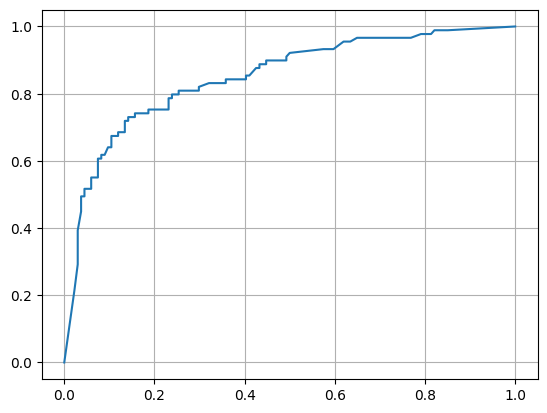

auc score: 0.8495304376991447


In [62]:
# x축 : FP (실제 정상인을 암환자라고 잘못 판단)
# y축 : TP (실제 암환자를 잘 판단) : 재현율 (Recall)
# FPR (rate) : 정상인을 암환자라고 잘못판단하지는 않았는가 -> 낮으면 좋음
# TPR (rate) : 암환자를 잘 판단했는가 -> 높으면 좋음

from sklearn.metrics import roc_curve

y_proba = r_forest.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_proba) # thresholds 비율

import matplotlib.pylab as plt
plt.plot(fpr, tpr)
plt.grid(True)
plt.show()

# ROC 곡선의 아래 영역의 넓이
# AUC : Area Under the Corve
# AUC가 1에 가까울수록 좋은 성능의 모델
# 0.8 이상만 되면 훌륭한 모델 (Excellent)
# 0.7 이상만 되도 좋은 모델(Good)
# 0.5 Trash 모델

# AUC 구하기
from sklearn.metrics import roc_auc_score

auc = roc_auc_score(y_test, y_proba)
print(f"auc score: {auc}")

In [63]:
# 타이타닉 train.csv를 불러와서
# pipeline 기능 사용하기
# 전처리 ~ 모델학습 ~ score확인
# 전 과정을 하나의 파이프에 연결하여
# 코드의 가독성 향상, 유지보수 용이, 재사용성 높다

In [13]:
from sklearn.pipeline import Pipeline

import pandas as pd

df = pd.read_csv("train.csv")
# 필요 없는 column 삭제 후 X, y 대입
X = df.drop(["Survived",  "Name", "Ticket", "Cabin", "PassengerId"], axis=1)
y = df["Survived"]

# 전처리 프로세스 
# 수치형 데이터 : Age, SibSp, Parch, Fare
# 범주형 데이터 : Sex, Embarked, Pclass
numeric_list = ["Age", "SibSp", "Parch", "Fare"]
categories_list = ["Sex", "Embarked", "Pclass"]


# 결축치가 존재한다면 평균으로 채움
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

pipe_mean_scaled = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="mean")),
    ("scaler", StandardScaler())
])

# 범주형 데이터중에 최빈 값 채운 이후에 One-Hot 인코딩
from sklearn.preprocessing import OneHotEncoder
pipe_freq_one_hot = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_Frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))    
])

# 우리가 만든 2개의 파이프를 원하는 컬럼에 적용하자
from sklearn.compose import ColumnTransformer
col_transf = ColumnTransformer(transformers=[
    ("num", pipe_mean_scaled, numeric_list),
    ("cat", pipe_freq_one_hot, categories_list)
])


# 최종 연결
from sklearn.neighbors import KNeighborsClassifier
result_pipeline = Pipeline(steps=[
    ("preprocessor", col_transf),
    ("classifier", KNeighborsClassifier(n_neighbors=3))
])

# 분할
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
result_pipeline.fit(X_train, y_train)

InvalidParameterError: The 'strategy' parameter of SimpleImputer must be a str among {'mean', 'constant', 'most_frequent', 'median'} or a callable. Got 'most_Frequent' instead.

In [21]:
from sklearn.pipeline import Pipeline
import pandas as pd

df = pd.read_csv("train.csv")
# 필요 없는 column 삭제 후 X, y 대입
X = df.drop(["Survived",  "Name", "Ticket", "Cabin", "PassengerId"], axis=1)
y = df["Survived"]

# 전처리 프로세스 
# 수치형 데이터 : Age, SibSp, Parch, Fare
# 범주형 데이터 : Sex, Embarked, Pclass
numeric_list = ["Age", "SibSp", "Parch", "Fare"]
categories_list = ["Sex", "Embarked", "Pclass"]

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
# 결측치가 존재한다면 평균으로 채움
pipe_mean_scaled = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="mean")),
    ("scaler", StandardScaler())
])

# 범주형 데이터 최빈 값 채운 이후에 One-Hot 인코딩
from sklearn.preprocessing import OneHotEncoder
pipe_freq_one_hot = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore")) # 원-핫 인코딩 적용
])

# 우리가 만든 2개의 파이프를 원하는 컬럼에 적용하자
from sklearn.compose import ColumnTransformer
col_transf = ColumnTransformer(transformers=[
    ("num", pipe_mean_scaled, numeric_list),
    ("cat", pipe_freq_one_hot, categories_list)
])

# 최종 연결(결합)
# KNN 쓰겠다
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
result_pipeline = Pipeline(steps=[
    ("preprocessor", col_transf),
    # ("classifier", SVC(kernel="rbf", C=1.0, random_state=42))
    # ("classifier", DecisionTreeClassifier(max_depth=3, random_state=42))
    # ("classifier", KNeighborsClassifier(n_neighbors=3))
    ("classifier", RandomForestClassifier(
        random_state=42,
        max_depth=10,
        n_estimators=200,
        min_samples_leaf=5))
])

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
result_pipeline.fit(X_train, y_train)

print(f"75% train 학습 데이터 점수 : {result_pipeline.score(X_train, y_train)}")
print(f"25% test 학습 데이터 점수 : {result_pipeline.score(X_test, y_test)}")

75% train 학습 데이터 점수 : 0.8607784431137725
25% test 학습 데이터 점수 : 0.8161434977578476
